### srt2json

In [3]:
import re
import json
import os

def parse_srt(srt_text):
    pattern = re.compile(r'(\d+)\n(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})\n(.*?)\n', re.DOTALL)
    matches = pattern.findall(srt_text)

    data = []
    skip_patterns = [r'\[', r'\]', r'【', r'】']  # 定义需要跳过的字符模式列表

    for match in matches:
        id_, start, end, content = match
        if any(re.search(pattern, content) for pattern in skip_patterns):
            continue  # 如果包含跳过字符，跳过这部分

        speaker_lines = content.strip().split('\n')
        for speaker_line in speaker_lines:
            if speaker_line.strip():  # 忽略空行
                # 进一步拆分可能包含多个说话者的行
                sub_lines = re.split(r'(?<=[。！？])(?=[^。！？]*：)', speaker_line)
                for sub_line in sub_lines:
                    parts = re.split(r':|：|;|；', sub_line, maxsplit=1)
                    if len(parts) == 2:
                        speaker, sentence = parts
                    else:
                        speaker = ''
                        sentence = parts[0]
                    entry = {
                        'id': id_,
                        'start_time': start,
                        'end_time': end,
                        'speaker': speaker.strip(),
                        'sentence': sentence.strip()
                    }
                    data.append(entry)
    return data

def srt_to_json(srt_file_path):
    with open(srt_file_path, 'r', encoding='utf-8') as file:
        srt_text = file.read()
    parsed_data = parse_srt(srt_text)
    return json.dumps(parsed_data, ensure_ascii=False, indent=4)

def convert_srt_to_json_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".srt"):
                srt_file_path = os.path.join(root, file)
                json_data = srt_to_json(srt_file_path)
                json_file_path = os.path.splitext(srt_file_path)[0] + '.json'
                with open(json_file_path, 'w', encoding='utf-8') as json_file:
                    json_file.write(json_data)
                print(f'Converted {srt_file_path} to {json_file_path}')

convert_srt_to_json_in_directory("Subtitle")


Converted Subtitle/alice's group/Nov 22, 2021 1027 AM/GMT20211122-022751/GMT20211122-022751_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Nov 22, 2021 1027 AM/GMT20211122-022751/GMT20211122-022751_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's group/Jan 10, 2022 0351 PM/GMT20220110-075157_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Jan 10, 2022 0351 PM/GMT20220110-075157_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's group/Dec 7, 2021 0926 AM/GMT20211207-012644/GMT20211207-012644_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Dec 7, 2021 0926 AM/GMT20211207-012644/GMT20211207-012644_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's group/Mar 8, 2022 1102 AM/GMT20220308-030238/GMT20220308-030238_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Mar 8, 2022 1102 AM/GMT20220308-030238/GMT20220308-030238_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's

### srt2json with duration

In [1]:
import re
import json
import os
from datetime import datetime, timedelta

def parse_srt(srt_text):
    pattern = re.compile(r'(\d+)\n(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})\n(.*?)\n', re.DOTALL)
    matches = pattern.findall(srt_text)

    data = []
    skip_patterns = [r'\[', r'\]', r'【', r'】']

    for match in matches:
        id_, start, end, content = match
        if any(re.search(pattern, content) for pattern in skip_patterns):
            continue

        start_time = datetime.strptime(start, '%H:%M:%S,%f')
        end_time = datetime.strptime(end, '%H:%M:%S,%f')

        # 如果 end_time 等于 start_time，则将 end_time 设置为 start_time + 0.5 秒
        if end_time == start_time:
            end_time = start_time + timedelta(seconds=0.5)

        duration = end_time - start_time
        duration_seconds = duration.total_seconds()
        duration_formatted = f"{duration_seconds:.3f}"

        speaker_lines = content.strip().split('\n')
        for speaker_line in speaker_lines:
            if speaker_line.strip():
                sub_lines = re.split(r'(?<=[。！？])(?=[^。！？]*：)', speaker_line)
                for sub_line in sub_lines:
                    parts = re.split(r':|：|;|；', sub_line, maxsplit=1)
                    if len(parts) == 2:
                        speaker, sentence = parts
                    else:
                        speaker = ''
                        sentence = parts[0]
                    entry = {
                        'id': id_,
                        'start_time': start,
                        'end_time': end_time.strftime('%H:%M:%S,%f')[:-3],
                        'duration': duration_formatted,
                        'speaker': speaker.strip(),
                        'sentence': sentence.strip()
                    }
                    data.append(entry)
    return data

def srt_to_json(srt_file_path):
    with open(srt_file_path, 'r', encoding='utf-8') as file:
        srt_text = file.read()
    parsed_data = parse_srt(srt_text)
    return json.dumps(parsed_data, ensure_ascii=False, indent=4)

def convert_srt_to_json_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".srt"):
                srt_file_path = os.path.join(root, file)
                json_data = srt_to_json(srt_file_path)
                json_file_path = os.path.splitext(srt_file_path)[0] + '.json'
                with open(json_file_path, 'w', encoding='utf-8') as json_file:
                    json_file.write(json_data)
                print(f'Converted {srt_file_path} to {json_file_path}')

convert_srt_to_json_in_directory("/userhome/34/h3619744/dataset/Audio2Caption_Demo")


Converted /userhome/34/h3619744/dataset/Audio2Caption_Demo/hera's group/Dec 8, 2021 0954 AM/GMT20211208-015432/GMT20211208-015432_Recording_gvo_1280x720_with_audio_handin3.srt to /userhome/34/h3619744/dataset/Audio2Caption_Demo/hera's group/Dec 8, 2021 0954 AM/GMT20211208-015432/GMT20211208-015432_Recording_gvo_1280x720_with_audio_handin3.json
Converted /userhome/34/h3619744/dataset/Audio2Caption_Demo/susanna's group/Nov 29, 2021 0356 PM susanna 6/GMT20211129-075627_Recording_gvo_1280x720_with_audio.srt to /userhome/34/h3619744/dataset/Audio2Caption_Demo/susanna's group/Nov 29, 2021 0356 PM susanna 6/GMT20211129-075627_Recording_gvo_1280x720_with_audio.json
Converted /userhome/34/h3619744/dataset/Audio2Caption_Demo/mini group/Dec 20, 2021 0451 PM mimi 6/GMT20211220-085128/(新規則人工校正后)GMT20211220-085128_Recording_gvo_1280x720_with_audio.srt to /userhome/34/h3619744/dataset/Audio2Caption_Demo/mini group/Dec 20, 2021 0451 PM mimi 6/GMT20211220-085128/(新規則人工校正后)GMT20211220-085128_Recording_g

### Duration statistics

Total count: 47720
GMT20211208-015432_Recording_gvo_1280x720_with_audio_handin3.json: 1314
GMT20211129-075627_Recording_gvo_1280x720_with_audio.json: 1605
(新規則人工校正后)GMT20211220-085128_Recording_gvo_1280x720_with_audio.json: 2417
(人工校正后1)GMT20211123-012646_Recording_gvo_1280x720_with_audio.json: 805
GMT20220322-025706_Recording_gvo_1280x720_with_audio(1).json: 1362
(人工校正后1)GMT20211109-025907_Recording_gvo_1280x720_with_audio.json: 1157
(人工校正后1)GMT20211102-025625_Recording_gvo_1280x720_with_audio.json: 1742
(人工校正后1)GMT20211123-025800_Recording_gvo_1280x720_with_audio.json: 704
GMT20220104-025628_Recording_gvo_1280x720_with_audio.json: 2387
GMT20211208-012847_Recording_gvo_1280x720_with_audio.json: 1170
GMT20211102-012834_Recording_gvo_1280x720_with_audio(1).json: 703
(人工校正后)GMT20211116-012531_Recording_gvo_1280x720_with_audio.json: 996
(人工校正后)GMT20220118-025518_Recording_gvo_1280x720_with_audio.json: 1141
GMT20211026-025710_Recording_gvo_1280x720_with_audio.json: 1294
(人工校正后1)GMT20211109

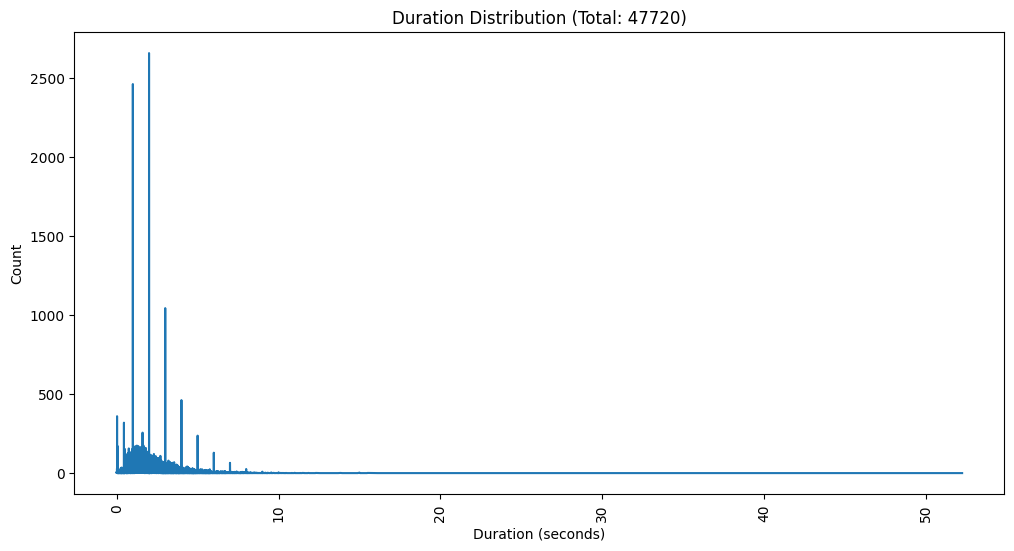

In [2]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt

def analyze_duration_distribution(directory):
    duration_counts = defaultdict(int)
    total_count = 0
    file_counts = {}
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    file_count = 0
                    for entry in data:
                        duration = float(entry['duration'])
                        duration_counts[round(duration, 3)] += 1
                        total_count += 1
                        file_count += 1
                    file_counts[file] = file_count

    duration_distribution = sorted(duration_counts.items(), key=lambda x: x[0])
    return duration_distribution, total_count, file_counts

def plot_duration_distribution(duration_distribution, total_count):
    durations, counts = zip(*duration_distribution)
    plt.figure(figsize=(12, 6))
    plt.plot(durations, counts)
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
    plt.title(f'Duration Distribution (Total: {total_count})')
    plt.xticks(rotation=90)
    plt.show()

if __name__ == '__main__':
    directory = "/userhome/34/h3619744/dataset/Audio2Caption_Demo"
    duration_distribution, total_count, file_counts = analyze_duration_distribution(directory)

    print(f"Total count: {total_count}")
    for file, count in file_counts.items():
        print(f"{file}: {count}")

    plot_duration_distribution(duration_distribution, total_count)

### Multispeaker

In [4]:
import re
import json
import os
from datetime import datetime, timedelta

def parse_srt(srt_text):
    pattern = re.compile(r'(\d+)\n(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})\n(.*?\n\n)', re.DOTALL)
    matches = pattern.findall(srt_text)
    data = []
    skip_patterns = [r'\[', r'\]', r'【', r'】']

    for match in matches:
        id_, start, end, content = match
        start_time = datetime.strptime(start, '%H:%M:%S,%f')
        end_time = datetime.strptime(end, '%H:%M:%S,%f')

        if end_time == start_time:
            end_time = start_time + timedelta(seconds=0.5)

        duration = end_time - start_time
        duration_seconds = duration.total_seconds()
        duration_formatted = f"{duration_seconds:.3f}"

        speaker_lines = re.split(r'\n(?=[A-Z])', content)

        for speaker_line in speaker_lines:
            if speaker_line.strip():
                parts = re.split(r':|：|;|；', speaker_line, maxsplit=1)
                if len(parts) == 2:
                    speaker, sentence = parts
                else:
                    speaker = ''
                    sentence = parts[0]

                entry = {
                    'id': id_,
                    'start_time': start,
                    'end_time': end_time.strftime('%H:%M:%S,%f')[:-3],
                    'duration': duration_formatted,
                    'speaker': speaker.strip(),
                    'sentence': sentence.strip()
                }
                data.append(entry)

    return data


def srt_to_json(srt_file_path):
    with open(srt_file_path, 'r', encoding='utf-8') as file:
        srt_text = file.read()
    parsed_data = parse_srt(srt_text)
    return json.dumps(parsed_data, ensure_ascii=False, indent=4)

def convert_srt_to_json_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".srt"):
                srt_file_path = os.path.join(root, file)
                json_data = srt_to_json(srt_file_path)
                json_file_path = os.path.splitext(srt_file_path)[0] + '.json'
                with open(json_file_path, 'w', encoding='utf-8') as json_file:
                    json_file.write(json_data)
                print(f'Converted {srt_file_path} to {json_file_path}')

convert_srt_to_json_in_directory("/home/pachen/dataset/Audio2Caption_Demo/alice's group")

Converted /home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 23, 2021 1026 AM/GMT20211123-022650_Recording.srt to /home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 23, 2021 1026 AM/GMT20211123-022650_Recording.json
Converted /home/pachen/dataset/Audio2Caption_Demo/alice's group/Jan 10, 2022 0351 PM/GMT20220110-075157_Recording_gvo_1280x720_with_audio.srt to /home/pachen/dataset/Audio2Caption_Demo/alice's group/Jan 10, 2022 0351 PM/GMT20220110-075157_Recording_gvo_1280x720_with_audio.json
Converted /home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 22, 2021 1027 AM/GMT20211122-022751/GMT20211122-022751_Recording_gvo_1280x720_with_audio.srt to /home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 22, 2021 1027 AM/GMT20211122-022751/GMT20211122-022751_Recording_gvo_1280x720_with_audio.json
Converted /home/pachen/dataset/Audio2Caption_Demo/alice's group/Jan 10, 2022 1031 AM/GMT20220110-023101_Recording_gvo_1280x720_with_audio.srt to /home/pachen/dataset/Audio2Capt

### 切割30s内的片段

In [ ]:
import re
from datetime import datetime, timedelta

import re
import json
import os
from datetime import datetime, timedelta

def parse_srt(srt_text):
    pattern = re.compile(r'(\d+)\n(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})\n(.*?\n\n)', re.DOTALL)
    matches = pattern.findall(srt_text)
    data = []

    current_id = 1
    start_time = None
    end_time = None
    combined_sentence = ""

    for match in matches:
        id_, start_str, end_str, content = match
        start_time_current = datetime.strptime(start_str, '%H:%M:%S,%f')
        end_time_current = datetime.strptime(end_str, '%H:%M:%S,%f')

        if end_time_current == start_time_current:
            end_time_current = start_time_current + timedelta(seconds=0.5)

        if start_time is None:
            start_time = start_time_current
            end_time = end_time_current

        duration = end_time_current - start_time
        duration_seconds = duration.total_seconds()

        if duration_seconds > 30:
            duration_formatted = f"{(end_time - start_time).total_seconds():.3f}"
            entry = {
                'id': str(current_id),
                'start_time': start_time.strftime('%H:%M:%S,%f')[:-3],
                'end_time': end_time.strftime('%H:%M:%S,%f')[:-3],
                'duration': duration_formatted,
                'sentence': combined_sentence.strip()
            }
            data.append(entry)
            current_id += 1
            combined_sentence = ""  
            start_time = start_time_current  

        combined_sentence += " ".join([line.strip() for line in content.strip().split('\n')]) + " "
        end_time = end_time_current

    if combined_sentence:
        duration_formatted = f"{(end_time - start_time).total_seconds():.3f}"
        entry = {
            'id': str(current_id),
            'start_time': start_time.strftime('%H:%M:%S,%f')[:-3],
            'end_time': end_time.strftime('%H:%M:%S,%f')[:-3],
            'duration': duration_formatted,
            'sentence': combined_sentence.strip()
        }
        data.append(entry)

    return data

def srt_to_json(srt_file_path):
    with open(srt_file_path, 'r', encoding='utf-8') as file:
        srt_text = file.read()
    parsed_data = parse_srt(srt_text)
    return json.dumps(parsed_data, ensure_ascii=False, indent=4)

def convert_srt_to_json_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".srt"):
                srt_file_path = os.path.join(root, file)
                json_data = srt_to_json(srt_file_path)
                json_file_path = os.path.splitext(srt_file_path)[0] + '30s.json'
                with open(json_file_path, 'w', encoding='utf-8') as json_file:
                    json_file.write(json_data)
                print(f'Converted {srt_file_path} to {json_file_path}')

convert_srt_to_json_in_directory("/home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 23, 2021 1026 AM")

### 切割大于30秒的片段

In [16]:
import re
import json
import os
from datetime import datetime, timedelta

def parse_srt(srt_text):
    pattern = re.compile(r'(\d+)\n(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})\n(.*?\n\n)', re.DOTALL)
    matches = pattern.findall(srt_text)
    data = []
    
    current_id = 1
    start_time = None
    end_time = None
    combined_sentence = ""
    
    for match in matches:
        id_, start_str, end_str, content = match
        start_time_current = datetime.strptime(start_str, '%H:%M:%S,%f')
        end_time_current = datetime.strptime(end_str, '%H:%M:%S,%f')
        
        if end_time_current == start_time_current:
            end_time_current = start_time_current + timedelta(seconds=0.5)
        
        if start_time is None:
            start_time = start_time_current
        
        speaker_lines = re.split(r'\n(?=[A-Z])', content)
        for speaker_line in speaker_lines:
            if speaker_line.strip():
                parts = re.split(r':|：|;|；', speaker_line, maxsplit=1)
                if len(parts) == 2:
                    speaker, sentence = parts
                else:
                    speaker = ''
                    sentence = parts[0]
                combined_sentence += sentence.strip() + " "
                end_time = datetime.strptime(end_str, '%H:%M:%S,%f')
        
        duration = end_time - start_time
        duration_seconds = duration.total_seconds()
        
        if duration_seconds <= 30:
            end_time = end_time_current
        else:
            duration_formatted = f"{duration_seconds:.3f}"
            entry = {
                'id': str(current_id),
                'start_time': start_time.strftime('%H:%M:%S,%f')[:-3],
                'end_time': end_time.strftime('%H:%M:%S,%f')[:-3],
                'duration': duration_formatted,
                # 'speaker': '',
                'sentence': combined_sentence.strip()
            }
            data.append(entry)
            current_id += 1
            combined_sentence = ""
            start_time = start_time_current
            end_time = None
    
    if combined_sentence:
        duration = end_time - start_time
        duration_seconds = duration.total_seconds()
        duration_formatted = f"{duration_seconds:.3f}"
        entry = {
            'id': str(current_id),
            'start_time': start_time.strftime('%H:%M:%S,%f')[:-3],
            'end_time': end_time.strftime('%H:%M:%S,%f')[:-3],
            'duration': duration_formatted,
            # 'speaker': '',
            'sentence': combined_sentence.strip()
        }
        data.append(entry)
    
    return data


def srt_to_json(srt_file_path):
    with open(srt_file_path, 'r', encoding='utf-8') as file:
        srt_text = file.read()
    parsed_data = parse_srt(srt_text)
    return json.dumps(parsed_data, ensure_ascii=False, indent=4)

def convert_srt_to_json_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".srt"):
                srt_file_path = os.path.join(root, file)
                json_data = srt_to_json(srt_file_path)
                json_file_path = os.path.splitext(srt_file_path)[0] + '30s.json'
                with open(json_file_path, 'w', encoding='utf-8') as json_file:
                    json_file.write(json_data)
                print(f'Converted {srt_file_path} to {json_file_path}')

convert_srt_to_json_in_directory("/home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 23, 2021 1026 AM")

Converted /home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 23, 2021 1026 AM/GMT20211123-022650_Recording.srt to /home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 23, 2021 1026 AM/GMT20211123-022650_Recording30s.json


In [18]:
# # backup
# import re
# from datetime import datetime, timedelta

# import re
# import json
# import os
# from datetime import datetime, timedelta

# def parse_srt(srt_text):
#     pattern = re.compile(r'(\d+)\n(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})\n(.*?\n\n)', re.DOTALL)
#     matches = pattern.findall(srt_text)
#     data = []

#     current_id = 1
#     start_time = None
#     end_time = None
#     combined_sentence = ""

#     for match in matches:
#         id_, start_str, end_str, content = match
#         start_time_current = datetime.strptime(start_str, '%H:%M:%S,%f')
#         end_time_current = datetime.strptime(end_str, '%H:%M:%S,%f')

#         if end_time_current == start_time_current:
#             end_time_current = start_time_current + timedelta(seconds=0.5)

#         if start_time is None:
#             start_time = start_time_current
#             end_time = end_time_current

#         duration = end_time_current - start_time
#         duration_seconds = duration.total_seconds()

#         if duration_seconds > 30:
#             # Save the current combined sentence before starting a new one
#             duration_formatted = f"{(end_time - start_time).total_seconds():.3f}"
#             entry = {
#                 'id': str(current_id),
#                 'start_time': start_time.strftime('%H:%M:%S,%f')[:-3],
#                 'end_time': end_time.strftime('%H:%M:%S,%f')[:-3],
#                 'duration': duration_formatted,
#                 'sentence': combined_sentence.strip()
#             }
#             data.append(entry)
#             current_id += 1
#             combined_sentence = ""  # Reset the combined sentence
#             start_time = start_time_current  # Start a new sentence block

#         combined_sentence += " ".join([line.strip() for line in content.strip().split('\n')]) + " "
#         end_time = end_time_current

#     # Add the last entry if there's any content left
#     if combined_sentence:
#         duration_formatted = f"{(end_time - start_time).total_seconds():.3f}"
#         entry = {
#             'id': str(current_id),
#             'start_time': start_time.strftime('%H:%M:%S,%f')[:-3],
#             'end_time': end_time.strftime('%H:%M:%S,%f')[:-3],
#             'duration': duration_formatted,
#             'sentence': combined_sentence.strip()
#         }
#         data.append(entry)

#     return data

# # The rest of the functions remain the same.


# def srt_to_json(srt_file_path):
#     with open(srt_file_path, 'r', encoding='utf-8') as file:
#         srt_text = file.read()
#     parsed_data = parse_srt(srt_text)
#     return json.dumps(parsed_data, ensure_ascii=False, indent=4)

# def convert_srt_to_json_in_directory(directory):
#     for root, dirs, files in os.walk(directory):
#         for file in files:
#             if file.endswith(".srt"):
#                 srt_file_path = os.path.join(root, file)
#                 json_data = srt_to_json(srt_file_path)
#                 json_file_path = os.path.splitext(srt_file_path)[0] + '30s.json'
#                 with open(json_file_path, 'w', encoding='utf-8') as json_file:
#                     json_file.write(json_data)
#                 print(f'Converted {srt_file_path} to {json_file_path}')

# 
# convert_srt_to_json_in_directory("/home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 23, 2021 1026 AM")

Converted /home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 23, 2021 1026 AM/GMT20211123-022650_Recording.srt to /home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 23, 2021 1026 AM/GMT20211123-022650_Recording30s.json


### 30s duration statistics

Total count: 115


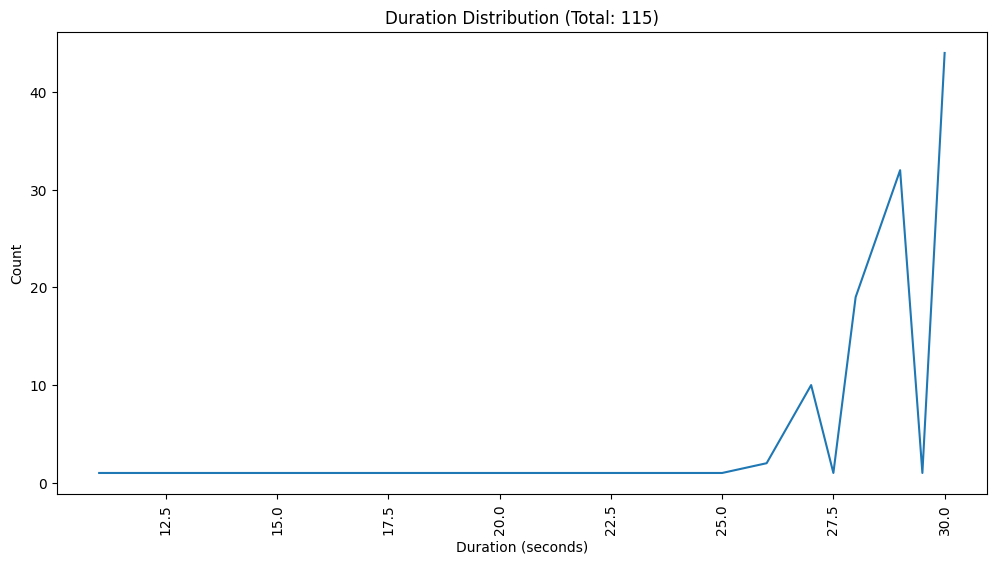

In [2]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

def analyze_duration_from_file(file_path):
    duration_counts = defaultdict(int)
    total_count = 0

    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        for entry in data:
            duration = float(entry['duration'])
            duration_counts[round(duration, 3)] += 1
            total_count += 1

    duration_distribution = sorted(duration_counts.items(), key=lambda x: x[0])
    return duration_distribution, total_count

def plot_duration_distribution(duration_distribution, total_count):
    durations, counts = zip(*duration_distribution)
    plt.figure(figsize=(12, 6))
    plt.plot(durations, counts)
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
    plt.title(f'Duration Distribution (Total: {total_count})')
    plt.xticks(rotation=90)
    plt.show()

if __name__ == '__main__':
    file_path = "/home/pachen/dataset/Audio2Caption_Demo/alice's group/Nov 23, 2021 1026 AM/GMT20211123-022650_Recording30s.json" 
    duration_distribution, total_count = analyze_duration_from_file(file_path)

    print(f"Total count: {total_count}")
    plot_duration_distribution(duration_distribution, total_count)
